In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Importing the data:

In [2]:
df = pd.read_csv('deliveryDatasetChallenge.csv',index_col=0)
df.head()

,anonID,birthdate,routeDate,region,gender,areaWealthLevel,areaPopulation,badWeather,weatherRestrictions,routeTotalDistance,numberOfShops,marketShare,avgAreaBenefits,timeFromAvg,advertising,employeeLYScore,employeeTenure,employeePrevComps,success
0,XLKC1691,23/10/1969,19/05/2020,NaN,M,Mid,30.66,No,No,28.3,26,49,18.90,0.35,3,4,1,1,NaN
1,KANY6459,14/04/1976,19/05/2020,LATAM,M,Mid,52.50,No,No,21.3,28,96,14.28,0.47,3,4,3,2,NaN
10,ULUZ5859,03/04/1985,NaN,NaN,M,High,25.08,Yes,No,25.9,25,76,14.01,NaN,2,3,1,1,NaN
100,LDCQ7279,24/03/1968,11/05/2020,NaN,M,Mid,37.14,No,No,24.3,26,65,19.20,-0.37,2,4,3,2,NaN
1000,KIUB5860,22/04/1978,19/05/2020,AMESA,M,Low,11.71,No,No,22.7,22,72,12.37,0.44,2,3,3,2,NaN


# Assessing the data: 

### Exploring the data types and the missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29389 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anonID               29389 non-null  object 
 1   birthdate            29389 non-null  object 
 2   routeDate            24342 non-null  object 
 3   region               20616 non-null  object 
 4   gender               29389 non-null  object 
 5   areaWealthLevel      26508 non-null  object 
 6   areaPopulation       29389 non-null  float64
 7   badWeather           29389 non-null  object 
 8   weatherRestrictions  29389 non-null  object 
 9   routeTotalDistance   29389 non-null  float64
 10  numberOfShops        29389 non-null  int64  
 11  marketShare          29389 non-null  int64  
 12  avgAreaBenefits      29381 non-null  float64
 13  timeFromAvg          17771 non-null  float64
 14  advertising          29389 non-null  int64  
 15  employeeLYScore      29389 non-null  

### Identifying how many NaN values in each column

In [4]:
for i in range(df.shape[1]):
    print(df.columns[i] , " " , df[df.columns[i]].isna().sum())
    

anonID   0
birthdate   0
routeDate   5047
region   8773
gender   0
areaWealthLevel   2881
areaPopulation   0
badWeather   0
weatherRestrictions   0
routeTotalDistance   0
numberOfShops   0
marketShare   0
avgAreaBenefits   8
timeFromAvg   11618
advertising   0
employeeLYScore   0
employeeTenure   0
employeePrevComps   0
success   5878


### So after Assesing the data I found out that there are some columns with missing values and here is how I solved it:

In [5]:
# filling the NaN values in Numeric features by the mean of the values
df.timeFromAvg=df.timeFromAvg.fillna(df.timeFromAvg.mean())
df.areaWealthLevel=df.areaWealthLevel.fillna(df.timeFromAvg.mean())
df.avgAreaBenefits=df.avgAreaBenefits.fillna(df.timeFromAvg.mean())

# filling the Missing values in 'region' by randomly choosen data from the same column
data = df["region"]
mask = data.isnull()
samples = random.choices( data[~mask].values , k = mask.sum() )
data[mask] = samples

<ipython-input-5-11e8bc97ecb6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[mask] = samples


### Now we make sure that edited Columns are filled successfully:

In [6]:
# the region column
df["region"].value_counts()

APAC      8495
AMESA     8406
Europe    7100
LATAM     5388
Name: region, dtype: int64

In [7]:
### Making sure there is no NaN values 

for i in range(df.shape[1]):
    print(df.columns[i] , " " , df[df.columns[i]].isna().sum())

anonID   0
birthdate   0
routeDate   5047
region   0
gender   0
areaWealthLevel   0
areaPopulation   0
badWeather   0
weatherRestrictions   0
routeTotalDistance   0
numberOfShops   0
marketShare   0
avgAreaBenefits   0
timeFromAvg   0
advertising   0
employeeLYScore   0
employeeTenure   0
employeePrevComps   0
success   5878


In [8]:
df.drop(['birthdate','routeDate'], axis = 1,inplace=True)
df.head()

,anonID,region,gender,areaWealthLevel,areaPopulation,badWeather,weatherRestrictions,routeTotalDistance,numberOfShops,marketShare,avgAreaBenefits,timeFromAvg,advertising,employeeLYScore,employeeTenure,employeePrevComps,success
0,XLKC1691,AMESA,M,Mid,30.66,No,No,28.3,26,49,18.90,0.350000,3,4,1,1,NaN
1,KANY6459,LATAM,M,Mid,52.50,No,No,21.3,28,96,14.28,0.470000,3,4,3,2,NaN
10,ULUZ5859,AMESA,M,High,25.08,Yes,No,25.9,25,76,14.01,0.004871,2,3,1,1,NaN
100,LDCQ7279,Europe,M,Mid,37.14,No,No,24.3,26,65,19.20,-0.370000,2,4,3,2,NaN
1000,KIUB5860,AMESA,M,Low,11.71,No,No,22.7,22,72,12.37,0.440000,2,3,3,2,NaN


## Since the data is in a clean and organized state, It's time to prepare the data for our model

    1- converting the text data into numeric data

In [9]:
cat_cols = ['gender','region','areaWealthLevel','badWeather','weatherRestrictions']
enc = LabelEncoder()

for col in cat_cols:
    df[col] = df[col].astype('str')
    df[col] = enc.fit_transform(df[col])

### Making sure its all now numeric

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29389 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anonID               29389 non-null  object 
 1   region               29389 non-null  int64  
 2   gender               29389 non-null  int64  
 3   areaWealthLevel      29389 non-null  int64  
 4   areaPopulation       29389 non-null  float64
 5   badWeather           29389 non-null  int64  
 6   weatherRestrictions  29389 non-null  int64  
 7   routeTotalDistance   29389 non-null  float64
 8   numberOfShops        29389 non-null  int64  
 9   marketShare          29389 non-null  int64  
 10  avgAreaBenefits      29389 non-null  float64
 11  timeFromAvg          29389 non-null  float64
 12  advertising          29389 non-null  int64  
 13  employeeLYScore      29389 non-null  int64  
 14  employeeTenure       29389 non-null  int64  
 15  employeePrevComps    29389 non-null  

    2- Removing the rows that are un labeled:

In [11]:
# Separating the data needed to be classified
df_q = df.query('success != success')
df_q.head()

,anonID,region,gender,areaWealthLevel,areaPopulation,badWeather,weatherRestrictions,routeTotalDistance,numberOfShops,marketShare,avgAreaBenefits,timeFromAvg,advertising,employeeLYScore,employeeTenure,employeePrevComps,success
0,XLKC1691,0,1,3,30.66,0,0,28.3,26,49,18.90,0.350000,3,4,1,1,NaN
1,KANY6459,3,1,3,52.50,0,0,21.3,28,96,14.28,0.470000,3,4,3,2,NaN
10,ULUZ5859,0,1,1,25.08,1,0,25.9,25,76,14.01,0.004871,2,3,1,1,NaN
100,LDCQ7279,2,1,3,37.14,0,0,24.3,26,65,19.20,-0.370000,2,4,3,2,NaN
1000,KIUB5860,0,1,2,11.71,0,0,22.7,22,72,12.37,0.440000,2,3,3,2,NaN


In [12]:
# Separating the labeled data to run the model
df_t = df.query('success == success')
df_t.head()

,anonID,region,gender,areaWealthLevel,areaPopulation,badWeather,weatherRestrictions,routeTotalDistance,numberOfShops,marketShare,avgAreaBenefits,timeFromAvg,advertising,employeeLYScore,employeeTenure,employeePrevComps,success
10000,VEZE5345,3,1,1,24.41,0,0,20.8,22,71,13.47,0.610000,0,3,2,2,1.0
10001,ZLGN3220,2,1,3,9.14,0,0,21.9,20,59,35.65,0.460000,3,4,3,2,1.0
10002,GNGF9983,2,1,3,27.30,0,0,26.0,22,54,16.38,0.004871,3,3,0,2,1.0
10003,LSDY3534,0,1,0,11.85,0,0,27.7,25,60,12.43,0.420000,0,2,2,1,1.0
10004,BNXK4003,2,1,3,26.46,0,0,26.0,24,61,19.74,0.004871,3,4,2,1,1.0


### identify wether the data in our model is over fitting or not

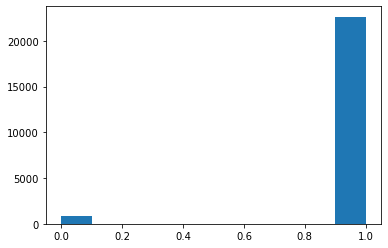

In [13]:
plt.hist(df_t.success);

In [14]:
df_t.success.value_counts()

1.0    22647
0.0      864
Name: success, dtype: int64

## As shown from graph the un successful labeled data are about only 4% of the whole data, which will lead to overfitting our model, So the best Algorithim to use is Random forest Algorithm: 
### this Algoritm creates many sample from the data to simulate the real world data ratio

### First: Feature Selection
#### To select the most features that affect the labeling

<ipython-input-15-9eaf17d318b3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,Y)


[0.05374129 0.01040796 0.05368627 0.13799389 0.00849213 0.00460475
 0.10856932 0.09421396 0.11362748 0.12820965 0.1173496  0.04780571
 0.0361008  0.04466435 0.04053285]


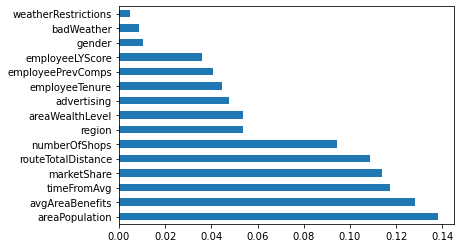

In [15]:
#apply SelectKBest class to extract top 10 best features
model = ExtraTreesClassifier()
X= df_t.drop(['anonID', 'success'], axis=1)
Y= df_t[['success']]
model.fit(X,Y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.show()

### As shown from graph, We will use the most 9 effective features and get rid of the remaining features


In [16]:
df_t.drop(['weatherRestrictions','badWeather','gender','employeeLYScore','employeeTenure','employeePrevComps'], axis = 1,inplace=True)
df_t.head()

/Users/ayaharfali/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,anonID,region,areaWealthLevel,areaPopulation,routeTotalDistance,numberOfShops,marketShare,avgAreaBenefits,timeFromAvg,advertising,success
10000,VEZE5345,3,1,24.41,20.8,22,71,13.47,0.610000,0,1.0
10001,ZLGN3220,2,3,9.14,21.9,20,59,35.65,0.460000,3,1.0
10002,GNGF9983,2,3,27.30,26.0,22,54,16.38,0.004871,3,1.0
10003,LSDY3534,0,0,11.85,27.7,25,60,12.43,0.420000,0,1.0
10004,BNXK4003,2,3,26.46,26.0,24,61,19.74,0.004871,3,1.0


# Preparing the traning data for our model:

In [17]:
x = df_t.drop(['anonID', 'success'], axis=1)
x = np.array(x)
x

array([[3.00000000e+00, 1.00000000e+00, 2.44100000e+01, ...,
        1.34700000e+01, 6.10000000e-01, 0.00000000e+00],
       [2.00000000e+00, 3.00000000e+00, 9.14000000e+00, ...,
        3.56500000e+01, 4.60000000e-01, 3.00000000e+00],
       [2.00000000e+00, 3.00000000e+00, 2.73000000e+01, ...,
        1.63800000e+01, 4.87085701e-03, 3.00000000e+00],
       ...,
       [2.00000000e+00, 1.00000000e+00, 2.03300000e+01, ...,
        2.67500000e+01, 8.00000000e-01, 3.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 7.56000000e+00, ...,
        1.42800000e+01, 4.87085701e-03, 2.00000000e+00],
       [2.00000000e+00, 0.00000000e+00, 2.56200000e+01, ...,
        1.34400000e+01, 3.10000000e-01, 2.00000000e+00]])

In [18]:
y = df_t[['success']]
y = np.array(y)
y

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

In [19]:
print(x.shape)
print(y.shape)

(23511, 9)
(23511, 1)


# Preparing the testing data that we will classify after our ML model results:

In [20]:
df_q.head()

,anonID,region,gender,areaWealthLevel,areaPopulation,badWeather,weatherRestrictions,routeTotalDistance,numberOfShops,marketShare,avgAreaBenefits,timeFromAvg,advertising,employeeLYScore,employeeTenure,employeePrevComps,success
0,XLKC1691,0,1,3,30.66,0,0,28.3,26,49,18.90,0.350000,3,4,1,1,NaN
1,KANY6459,3,1,3,52.50,0,0,21.3,28,96,14.28,0.470000,3,4,3,2,NaN
10,ULUZ5859,0,1,1,25.08,1,0,25.9,25,76,14.01,0.004871,2,3,1,1,NaN
100,LDCQ7279,2,1,3,37.14,0,0,24.3,26,65,19.20,-0.370000,2,4,3,2,NaN
1000,KIUB5860,0,1,2,11.71,0,0,22.7,22,72,12.37,0.440000,2,3,3,2,NaN


In [21]:
df_q2 = df_q.copy()
df_q2.drop(['weatherRestrictions','badWeather','gender','employeeLYScore','employeeTenure','employeePrevComps'], axis = 1,inplace=True)

df_q2.drop(['success'],axis = 1,inplace = True)



df_qarray = df_q2.drop(['anonID'],axis = 1)
q_test = np.array(df_qarray)
q_test.shape  


(5878, 9)

In [22]:
df_qarray.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5878 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   region              5878 non-null   int64  
 1   areaWealthLevel     5878 non-null   int64  
 2   areaPopulation      5878 non-null   float64
 3   routeTotalDistance  5878 non-null   float64
 4   numberOfShops       5878 non-null   int64  
 5   marketShare         5878 non-null   int64  
 6   avgAreaBenefits     5878 non-null   float64
 7   timeFromAvg         5878 non-null   float64
 8   advertising         5878 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 459.2 KB


### Secound: Hyperparameter Tuning the Random Forest

In [23]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, random_state=0,test_size=0.2)

In [24]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [25]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/ayaharfali/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/ayaharfali/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [26]:
rf_random.best_params_


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

### Third: Bulding the model

In [ ]:

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(x_train, y_train)

<ipython-input-27-d45f7e5e1912>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


In [ ]:
# Actual class predictions
rf_predictions = model.predict(x_test)
# Probabilities for each class
rf_probs = model.predict_proba(x_test)[:, 1]

## Calculating the AUC_ROC  value

In [ ]:
# Calculate roc auc
AUC_ROC = roc_auc_score(y_test, rf_probs)
AUC_ROC

In [ ]:
cm = confusion_matrix(y_test, rf_predictions)
print (cm)
print(f1_score(y_test, rf_predictions))

In [ ]:
# Actual class predictions
rf_predictions = model.predict(q_test)
rf_predictions

In [ ]:
rf_predictions.shape

In [ ]:
df_qarray.head()

In [ ]:
df_q2

## Converting the result into a data frame

In [ ]:
df_success_rf_predictions = pd.DataFrame(rf_predictions, 
             columns=['success'])
df_success_rf_predictions

## Creating the last Data frame for our classified data:
### 1- Merging the result data frame with the features data frame
### 2- Joining the previous data frame with testing data frame
### 3- Dropping the feature columns to have only the ID and it's label

In [ ]:
#1- Merging the result data frame with the features data frame
df_success_rf_predictions= pd.concat([df_qarray, df_success_rf_predictions],axis=1)
df_success_rf_predictions.info()

In [ ]:
df_success_rf_predictions

In [ ]:
# 2- Joining the previous data frame with testing data frame
outer_merged = pd.merge(df_q2, df_success_rf_predictions, how="outer")
outer_merged.shape

In [ ]:
outer_merged.head()

In [ ]:
# 3- dropping the feature columns to have only the ID and it's label¶
outer_merged.drop(df_qarray.columns, axis = 1,inplace=True)
outer_merged

In [ ]:
plt.hist(outer_merged.success);

# Distinguish the result of our data: 

In [ ]:
print('Number of Successfull dealers: ', outer_merged.query('success == 1.0').success.count())
print('Number of UnSuccessfull dealers: ', outer_merged.query('success == 0.0').success.count())

In [ ]:
outer_merged.anonID.nunique()

# Exctarcting the Result as CSV file:

In [ ]:
outer_merged.to_csv('Success Clasification for IDs.csv')